# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the dataset

In [2]:
df=pd.read_csv('tweets.csv')


In [3]:
df

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   author  400 non-null    object
 2   status  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


# 3. Split the dataset into X and y

In [5]:
x = df['status']
y = df['author']

# 4. Split the dataset into training set and testing set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [7]:
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()


In [8]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_count = count_vectorizer.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [9]:
LR_tf = LogisticRegression(random_state=42)
LR_tf.fit(X_train_tfidf, y_train)


LogisticRegression(random_state=42)

In [10]:
predicted_lrt=LR_tf.predict(X_test_tfidf)

In [11]:
lrs=confusion_matrix(predicted_lrt, y_test)
lrs

array([[42,  7],
       [ 2, 29]])

In [12]:
print(classification_report(predicted_lrt, y_test))

                 precision    recall  f1-score   support

Donald J. Trump       0.95      0.86      0.90        49
 Justin Trudeau       0.81      0.94      0.87        31

       accuracy                           0.89        80
      macro avg       0.88      0.90      0.88        80
   weighted avg       0.90      0.89      0.89        80



In [13]:
LR_con = LogisticRegression(random_state=42)
LR_con.fit(X_train_count, y_train)

LogisticRegression(random_state=42)

In [14]:
predicted_lrc=LR_con.predict(X_test_tfidf)

In [15]:
print(confusion_matrix(predicted_lrc, y_test))

[[43 34]
 [ 1  2]]


In [16]:
print(classification_report(predicted_lrc, y_test))

                 precision    recall  f1-score   support

Donald J. Trump       0.98      0.56      0.71        77
 Justin Trudeau       0.06      0.67      0.10         3

       accuracy                           0.56        80
      macro avg       0.52      0.61      0.41        80
   weighted avg       0.94      0.56      0.69        80



# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [17]:
svm_tf = SVC(random_state=42)
svm_tf.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [18]:
predicted_svt=svm_tf.predict(X_test_tfidf)

In [19]:
svp=confusion_matrix(predicted_svt, y_test)
svp

array([[42,  7],
       [ 2, 29]])

In [20]:
print(classification_report(predicted_svt, y_test))

                 precision    recall  f1-score   support

Donald J. Trump       0.95      0.86      0.90        49
 Justin Trudeau       0.81      0.94      0.87        31

       accuracy                           0.89        80
      macro avg       0.88      0.90      0.88        80
   weighted avg       0.90      0.89      0.89        80



In [21]:
svm_con = SVC(random_state=42)
svm_con.fit(X_train_count, y_train)

SVC(random_state=42)

In [22]:
predicted_svco=svm_con.predict(X_test_tfidf)

In [23]:
print(confusion_matrix(predicted_svco, y_test))

[[43 36]
 [ 1  0]]


In [24]:
print(classification_report(predicted_svco, y_test))

                 precision    recall  f1-score   support

Donald J. Trump       0.98      0.54      0.70        79
 Justin Trudeau       0.00      0.00      0.00         1

       accuracy                           0.54        80
      macro avg       0.49      0.27      0.35        80
   weighted avg       0.97      0.54      0.69        80



# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [29]:
print('\tConfusion matrix for SVC \n',lrs)
print('\tConfusion matrix for LR \n',svp)


	Confusion matrix for SVC 
 [[42  7]
 [ 2 29]]
	Confusion matrix for LR 
 [[42  7]
 [ 2 29]]


# 9. Plot a confusion matrix for both Logistic Regression and SVM

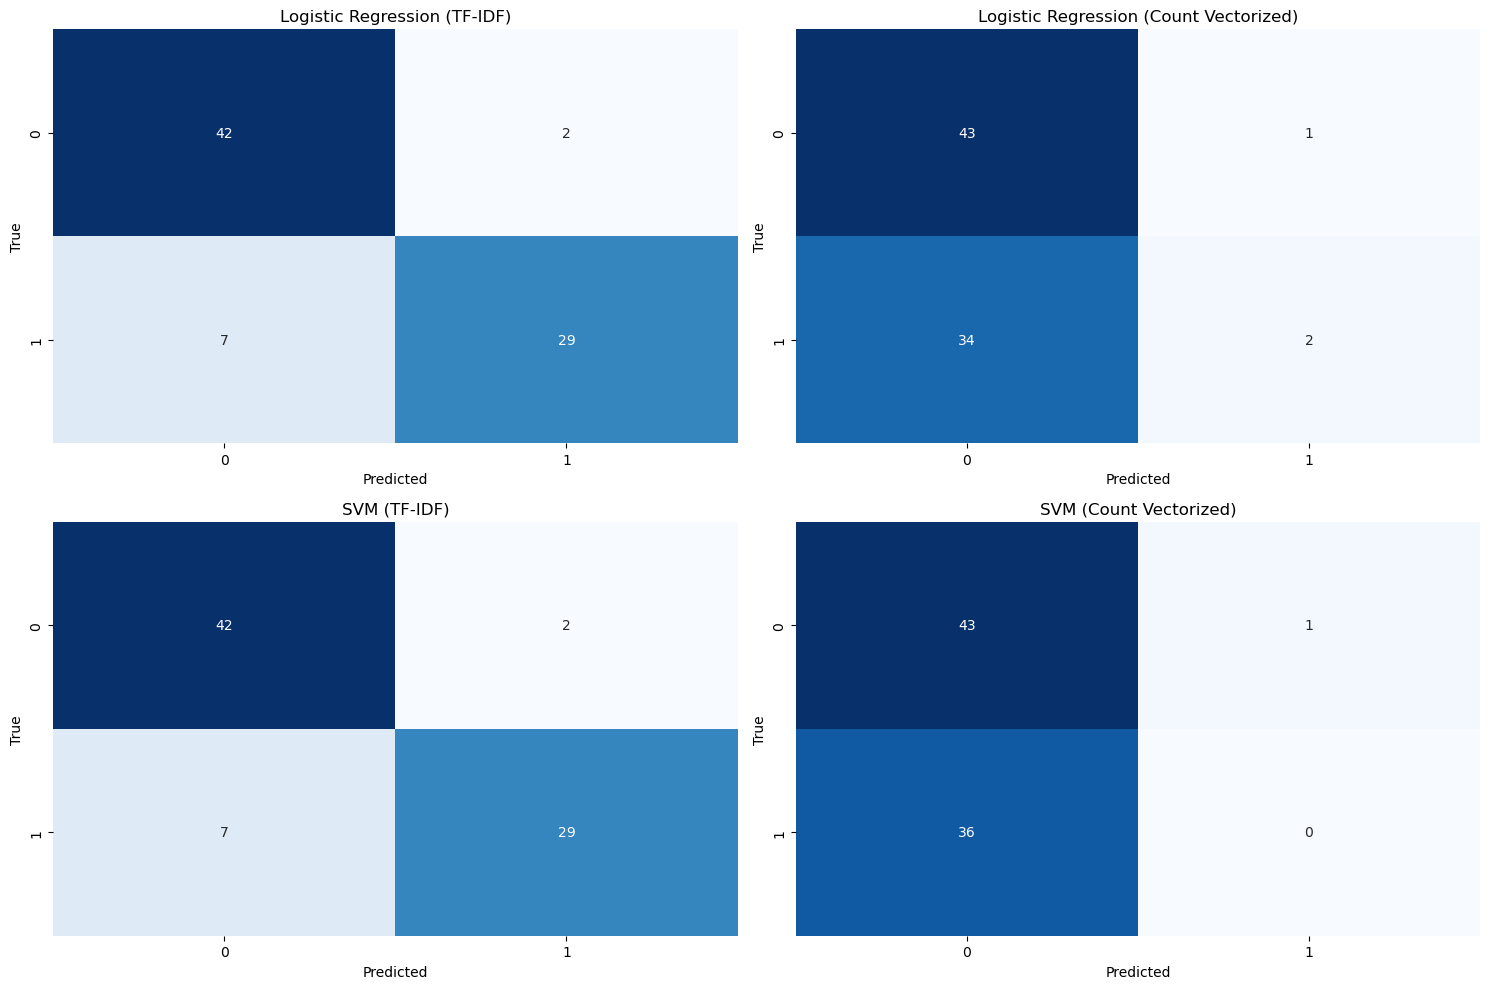

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


sns.heatmap(confusion_matrix(y_test, predicted_lrt), annot=True,  cmap="Blues", cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression (TF-IDF)")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, predicted_lrc), annot=True,  cmap="Blues", cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Logistic Regression (Count Vectorized)")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, predicted_svt), annot=True,  cmap="Blues", cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("SVM (TF-IDF)")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, predicted_svco), annot=True,  cmap="Blues", cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("SVM (Count Vectorized)")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("True")


plt.tight_layout()
plt.show()